### Source：DataGOV - 不動產買賣實價登錄批次資料 (http://data.gov.tw/node/6213) - 台北市資料

# 一、Data Import - 資料匯入

In [1]:
#!pip install pandas
#!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#作圖在jupyter notebook
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['font.family']='SimHei' #顯示中文
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊

df = pd.read_csv('A_LAND.csv', encoding='big5') #台北市
df.sample(5) #隨機取其中5筆資料

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
316,中山區,土地,榮星段五小段91~120地號,54.27,其他,NaN,NaN,1060522,土地1建物0車位0,NaN,NaN,其他,NaN,NaN,NaN,0.00,0,0,0,有,無,1411020,26000.0,NaN,0.0,0,NaN,RPRPMLTJOHMFFCA48CA
114,大同區,車位,臺北市大同區昌吉街1~30號,0.17,住,NaN,NaN,1060519,土地0建物0車位1,一層,十四層,其他,見其他登記事項,鋼筋混凝土造,1010112.0,46.75,0,0,0,有,有,2630000,NaN,坡道平面,0.0,2630000,NaN,RPTNMLLJOHMFFBA57CA
469,大安區,房地(土地+建物),臺北市大安區新生南路一段157巷1~30號,23.30,住,NaN,NaN,1060502,土地1建物1車位0,四層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,1010330.0,120.64,1,2,1,有,有,35000000,290119.0,NaN,0.0,0,NaN,RPOOMLRJOHMFFFA18CA
0,大同區,房地(土地+建物),臺北市大同區南京西路91~120號,6.34,住,NaN,NaN,1040303,土地1建物1車位0,八層,十一層,住宅大樓(11層含以上有電梯),商業用,鋼筋混凝土造,831111.0,55.19,1,1,1,有,有,12900000,233738.0,NaN,0.0,0,NaN,RPPOMLMKPHMFFBA57CA
337,信義區,房地(土地+建物),臺北市信義區吳興街336巷1~30號,20.17,住,NaN,NaN,1060425,土地1建物1車位0,一層,四層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,621224.0,46.87,2,2,2,有,無,8700000,185620.0,NaN,0.0,0,含增建或未登記建物-平台。,RPRNMLOJOHMFFDA97DA


# 二、資料預處理(一)

## 2.1 交易標的：非土地、車位交易

In [3]:
df.info() 
#像是"非都市土地使用分區"、"非都市土地使用編定" 全為空直 都能直接去除 
#其餘過多空值的特徵(如:車位類別、備註)欄位也要考慮如何處理 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 28 columns):
鄉鎮市區            841 non-null object
交易標的            841 non-null object
土地區段位置或建物區門牌    841 non-null object
土地移轉總面積平方公尺     841 non-null float64
都市土地使用分區        829 non-null object
非都市土地使用分區       0 non-null float64
非都市土地使用編定       0 non-null float64
交易年月日           841 non-null int64
交易筆棟數           841 non-null object
移轉層次            776 non-null object
總樓層數            774 non-null object
建物型態            841 non-null object
主要用途            747 non-null object
主要建材            775 non-null object
建築完成年月          679 non-null float64
建物移轉總面積平方公尺     841 non-null float64
建物現況格局-房        841 non-null int64
建物現況格局-廳        841 non-null int64
建物現況格局-衛        841 non-null int64
建物現況格局-隔間       841 non-null object
有無管理組織          841 non-null object
總價元             841 non-null int64
單價每平方公尺         796 non-null float64
車位類別            260 non-null object
車位移轉總面積平方公尺     841 non-null float

In [4]:
df['交易標的'].value_counts() #因為預測的式房價、所以土地與建物不需要看，選擇去除

房地(土地+建物)       512
房地(土地+建物)+車位    216
土地               59
車位               44
建物               10
Name: 交易標的, dtype: int64

In [5]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
土地,215.995593,NaN,NaN,1.059181e+06,NaN,0.000000,0.000000,0.000000,0.000000,7.343879e+06,123041.372881,0.000000,0.000000e+00
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,5.636200e+06,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1.472509e+07,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4.283112e+07,191406.018605,34.382361,1.393102e+06
車位,2.486136,NaN,NaN,1.060058e+06,908492.702703,41.700682,0.000000,0.000000,0.000000,2.502386e+06,NaN,30.595227,2.368295e+06


In [6]:
# 去除土地和車位兩種交易資料
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)

In [7]:
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 #改成以萬為單位，方便圖表顯示

In [8]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,563.620000,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1472.509301,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4283.111866,191406.018605,34.382361,1.393102e+06


## 2.2 產生特徵：交易年/屋齡

In [9]:
print(df.loc[0,'交易年月日'])
print(type(df.loc[0,'交易年月日']))
# format 為 int

1040303
<class 'numpy.int64'>


In [10]:
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)

In [11]:
print(df.loc[0,'建築完成年月'])
print(type(df.loc[0,'建築完成年月']))

831111.0
<class 'numpy.float64'>


In [12]:
from datetime import datetime
now = datetime.now()
now.year #(年,月,日,時,分,秒,微秒) ps: 微秒(microseconds)=1/1000000秒

2019

In [13]:
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)

In [14]:
df.sample(1)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,建築完成年,屋齡
277,士林區,房地(土地+建物),臺北市士林區中山北路六段236巷1弄1~30號,141.0,住,NaN,NaN,1060402,土地2建物2車位0,全,二層,透天厝,住家用,加強磚造,610502.0,189.96,4,2,2,有,無,6100.0,321120.0,NaN,0.0,0,含增建或未登記建物-平台、陽台加窗。權利人二人,RPOPMLRJOHMFFEA28DA,106.0,61.0,47.0


# 三、資料探索

## 3.1 各鄉鎮資料筆數

In [15]:
print(df.groupby('鄉鎮市區').mean())

      土地移轉總面積平方公尺  非都市土地使用分區  非都市土地使用編定         交易年月日         建築完成年月  \
鄉鎮市區                                                                   
中山區     16.297692        NaN        NaN  1.059511e+06  859717.408602   
中正區     17.749583        NaN        NaN  1.058806e+06  833266.128205   
信義區     28.029821        NaN        NaN  1.059941e+06  782899.341463   
內湖區     37.064609        NaN        NaN  1.057065e+06  868947.672566   
北投區     28.839167        NaN        NaN  1.059124e+06  870631.733333   
南港區     31.355000        NaN        NaN  1.060145e+06  919194.321429   
士林區     33.232364        NaN        NaN  1.060461e+06  779604.018182   
大同區     18.098182        NaN        NaN  1.059527e+06  838809.000000   
大安區     22.519455        NaN        NaN  1.060451e+06  823444.083333   
文山區     32.762361        NaN        NaN  1.059655e+06  885623.607143   
松山區     23.050000        NaN        NaN  1.060453e+06  745821.975610   
萬華區     19.857419        NaN        NaN  1.060463e+06  760174.03

Text(0,0.5,'資料筆數')

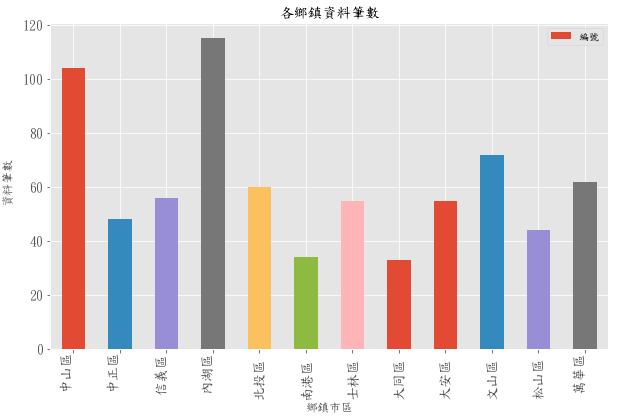

In [16]:
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(10,6),fontsize=14,title='各鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

## 3.2 相關性分析

In [17]:
corr = df[['總價元','土地移轉總面積平方公尺','建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年']].corr()
corr

,總價元,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年
總價元,1.000000,0.718356,0.897664,0.037094,-0.051536,0.062915,0.472775,0.517171,-0.351787,0.351787,-0.044518
土地移轉總面積平方公尺,0.718356,1.000000,0.837357,0.218130,0.107488,0.168725,0.236906,0.215380,-0.090268,0.090268,0.006141
建物移轉總面積平方公尺,0.897664,0.837357,1.000000,0.072909,-0.027742,0.056027,0.451150,0.384596,-0.303746,0.303746,-0.048933
建物現況格局-房,0.037094,0.218130,0.072909,1.000000,0.664950,0.761660,0.016739,-0.012425,0.101536,-0.101536,-0.032178
建物現況格局-廳,-0.051536,0.107488,-0.027742,0.664950,1.000000,0.547287,-0.049335,-0.076489,0.051712,-0.051712,-0.001068
建物現況格局-衛,0.062915,0.168725,0.056027,0.761660,0.547287,1.000000,0.009501,-0.009853,-0.025424,0.025424,-0.070500
車位移轉總面積平方公尺,0.472775,0.236906,0.451150,0.016739,-0.049335,0.009501,1.000000,0.741627,-0.462698,0.462698,-0.096084
車位總價元,0.517171,0.215380,0.384596,-0.012425,-0.076489,-0.009853,0.741627,1.000000,-0.357414,0.357414,-0.061319
屋齡,-0.351787,-0.090268,-0.303746,0.101536,0.051712,-0.025424,-0.462698,-0.357414,1.000000,-1.000000,0.142024
建築完成年,0.351787,0.090268,0.303746,-0.101536,-0.051712,0.025424,0.462698,0.357414,-1.000000,1.000000,-0.142024


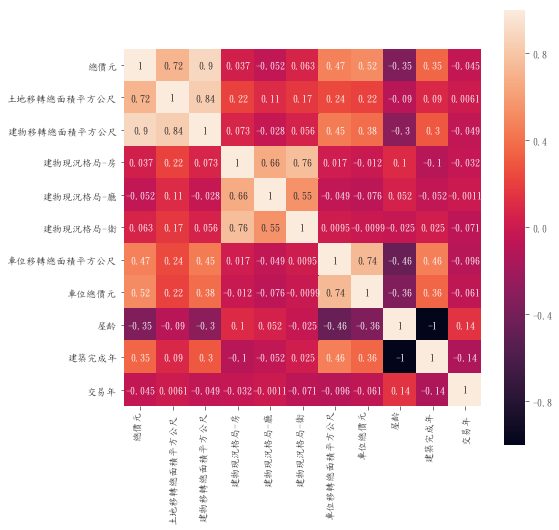

In [18]:
import seaborn as sns
#plt.rcParams['font.family']='SimHei' #顯示中文
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10) DFKai-SB, Microsoft JhengHei, PMingLiU
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True)
plt.show()

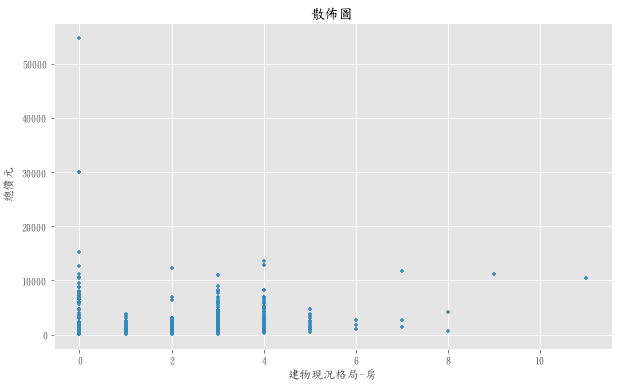

In [19]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-房',y='總價元',marker='+')

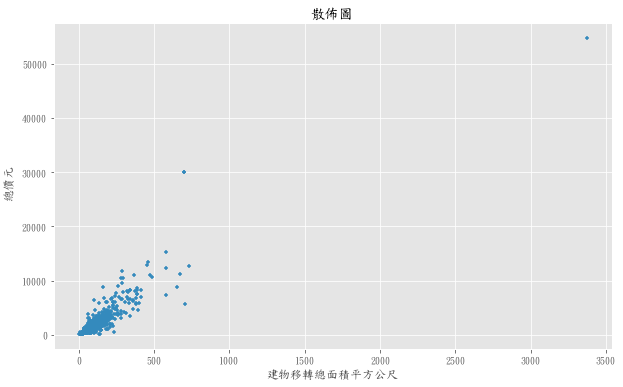

In [20]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物移轉總面積平方公尺',y = '總價元',marker='+')

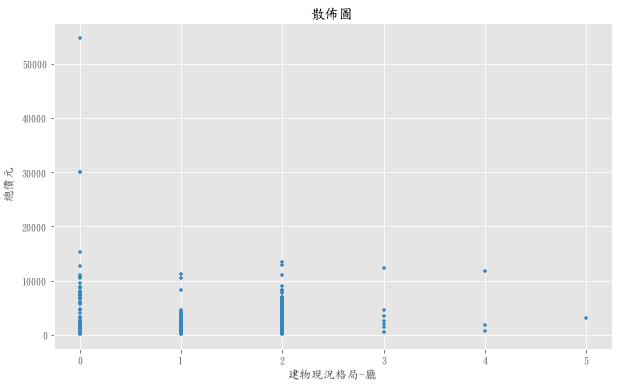

In [21]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-廳',y='總價元',marker='+')

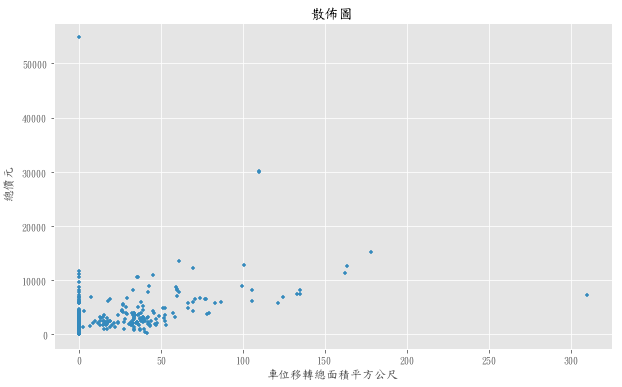

In [22]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='車位移轉總面積平方公尺',y='總價元',marker='+')

## 3.3 各鄉鎮比較

In [23]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元
鄉鎮市區,,,,,,,,,,,,
中山區,16.297692,105.000096,182520.461538,2.076923,1.375000,1.519231,7.903173,479519.230769,22.096774,85.903226,105.903846,2139.697917
中正區,17.749583,113.277500,203961.895833,1.708333,1.145833,1.187500,5.110417,277083.333333,24.743590,83.256410,105.833333,2477.166704
信義區,28.029821,127.634286,189706.750000,2.267857,1.428571,1.446429,8.865714,298214.285714,29.780488,78.219512,105.946429,2314.053964
內湖區,37.064609,182.183652,162547.035088,2.521739,1.530435,1.547826,17.334609,478695.652174,21.176991,86.823009,105.652174,2892.934783
北投區,28.839167,133.713000,142094.283333,2.050000,1.366667,1.350000,17.170833,734166.666667,21.016667,86.983333,105.866667,1960.550000
南港區,31.355000,156.041176,164861.647059,2.294118,1.529412,1.500000,15.133824,555882.352941,16.142857,91.857143,105.970588,2641.029412
士林區,33.232364,148.830000,179288.290909,2.309091,1.563636,1.545455,15.637818,938181.818182,30.109091,77.890909,106.000000,3244.573075
大同區,18.098182,108.097576,142900.272727,2.212121,1.454545,1.303030,7.021212,192424.242424,24.185185,83.814815,105.909091,1549.110000
大安區,22.519455,126.577636,247827.327273,2.163636,1.436364,1.400000,6.381818,252727.272727,25.722222,82.277778,106.000000,3099.045173


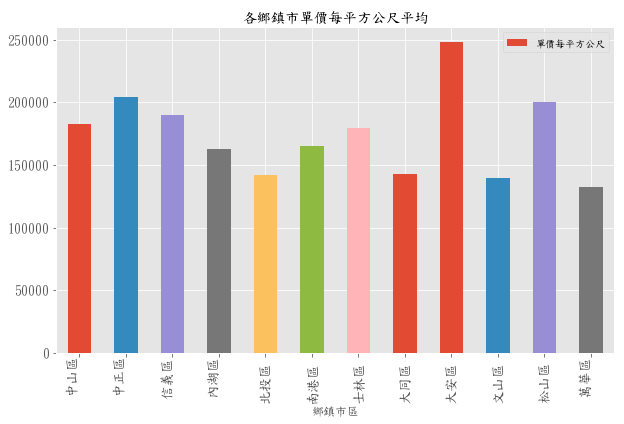

In [24]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar',y='單價每平方公尺',figsize=(10,6),fontsize=14,title='各鄉鎮市單價每平方公尺平均')

# 四、資料預處理(二) - 機器學習

## 4.1 針對鄉鎮市區做one-hot encoding

In [25]:
df_region = pd.get_dummies(df['鄉鎮市區'])
df_region.head()

,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [26]:
df_ml = pd.merge(df2,df_region,left_index=True,right_index=True)
df_ml.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738.0,1,1,1,0.00,0,25.0,83.0,104.0,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853.0,1,1,1,0.00,0,23.0,85.0,105.0,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815.0,3,2,2,12.96,0,11.0,97.0,105.0,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046.0,3,2,1,34.60,0,11.0,97.0,105.0,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,197216.0,5,2,2,51.07,0,15.0,93.0,105.0,4788.0,0,0,0,1,0,0,0,0,0,0,0,0


## 4.2 去除遺失值和極端值

In [27]:
len(df_ml)

738

In [28]:
df_ml = df_ml.dropna().reset_index(drop=True)
len(df_ml)

641

In [29]:
df_ml = df_ml[df_ml['建物移轉總面積平方公尺']<1000]

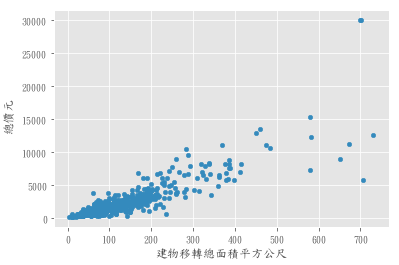

In [30]:
df_ml.plot(kind='scatter',x='建物移轉總面積平方公尺',y='總價元')

# 再次查看數據集 做數據清理_ 2019_4_11

In [31]:
df_ml

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738.0,1,1,1,0.00,0,25.0,83.0,104.0,1290.0000,0,0,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853.0,1,1,1,0.00,0,23.0,85.0,105.0,430.0000,0,0,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815.0,3,2,2,12.96,0,11.0,97.0,105.0,2400.0000,0,0,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046.0,3,2,1,34.60,0,11.0,97.0,105.0,2030.0000,0,0,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,197216.0,5,2,2,51.07,0,15.0,93.0,105.0,4788.0000,0,0,0,1,0,0,0,0,0,0,0,0
5,內湖區,15.12,47.74,257227.0,2,2,2,0.00,0,16.0,92.0,105.0,1228.0000,0,0,0,1,0,0,0,0,0,0,0,0
6,內湖區,27.44,115.29,119698.0,4,2,2,0.00,0,35.0,73.0,105.0,1380.0000,0,0,0,1,0,0,0,0,0,0,0,0
7,內湖區,16.90,133.73,160772.0,3,1,2,0.00,0,11.0,97.0,105.0,2150.0000,0,0,0,1,0,0,0,0,0,0,0,0
8,內湖區,23.43,142.73,167309.0,2,1,2,37.71,0,14.0,94.0,105.0,2388.0000,0,0,0,1,0,0,0,0,0,0,0,0
9,內湖區,28.03,170.77,161035.0,3,1,2,38.00,0,21.0,87.0,105.0,2750.0000,0,0,0,1,0,0,0,0,0,0,0,0


In [32]:
#查看所有特徵的分布情形
df_ml.describe()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,24.879438,128.071313,170221.126562,2.214062,1.437500,1.440625,11.542344,4.701719e+05,24.575000,83.425000,105.879688,2261.416454,0.145313,0.060937,0.064062,0.173437,0.093750,0.043750,0.085938,0.042188,0.056250,0.087500,0.064062,0.082812
std,21.209026,103.218387,69866.202966,1.365615,0.741673,0.821983,27.470009,1.601587e+06,15.021654,15.021654,0.432874,2623.740026,0.352691,0.239403,0.245056,0.378921,0.291709,0.204698,0.280491,0.201174,0.230584,0.282787,0.245056,0.275814
min,0.000000,3.860000,15352.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,51.000000,102.000000,71.109100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.977500,66.547500,125744.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000,71.000000,106.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.010000,102.950000,162839.000000,3.000000,2.000000,1.000000,0.000000,0.000000e+00,25.000000,83.000000,106.000000,1584.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.195000,153.720000,206023.250000,3.000000,2.000000,2.000000,3.697500,0.000000e+00,37.000000,98.000000,106.000000,2530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.730000,731.400000,604342.000000,9.000000,4.000000,7.000000,309.760000,1.520000e+07,57.000000,106.000000,106.000000,30090.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


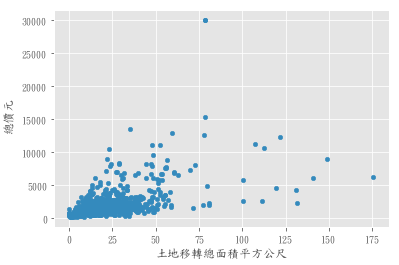

In [33]:
df_ml.plot(kind='scatter',x='土地移轉總面積平方公尺',y='總價元') #有兩個非常極端的數據 總價元 = 30090 與 統地移轉總面積 175 這兩筆數據刪除

In [34]:
len(df_ml)

640

In [35]:
df_ml = df_ml.loc[df_ml['土地移轉總面積平方公尺'] < 125] #去除小於125 的值
df_ml = df_ml.loc[df_ml['總價元'] != 30090] #去除掉 總價元為30090 的數據

In [36]:
len(df_ml)

634

####  單價每平方公尺 極端值處理 

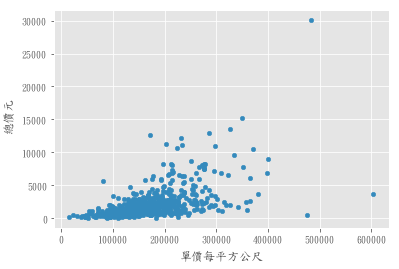

In [37]:
df_ml.plot(kind='scatter',x='單價每平方公尺',y='總價元') #發現三個值偏離整體趨勢 其單位平方值皆大於400000

In [38]:
m = df_ml['單價每平方公尺'] > 410000
m.value_counts()

False    631
True       3
Name: 單價每平方公尺, dtype: int64

In [39]:
df_ml = df_ml.loc[df_ml['單價每平方公尺'] < 410000] #去除偏離值

In [40]:
df_ml.columns

Index(['鄉鎮市區', '土地移轉總面積平方公尺', '建物移轉總面積平方公尺', '單價每平方公尺', '建物現況格局-房', '建物現況格局-廳',
       '建物現況格局-衛', '車位移轉總面積平方公尺', '車位總價元', '屋齡', '建築完成年', '交易年', '總價元', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區'],
      dtype='object')

###  建物現況格局-房 偏離值處理

In [41]:
m = df_ml['建物現況格局-房'] > 5
m.value_counts() # 去除偏離值

False    625
True       6
Name: 建物現況格局-房, dtype: int64

In [42]:
df_ml = df_ml.loc[df_ml['建物現況格局-房'] < 5] 

In [43]:
len(df_ml)

615

### 建物現況格局-廳 偏離值處理

In [44]:
m = df_ml['建物現況格局-廳'] > 2
m.value_counts()

False    609
True       6
Name: 建物現況格局-廳, dtype: int64

In [45]:
df_ml.loc[df_ml['建物現況格局-廳'] > 2] #看似合理 不進行處理

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
212,松山區,18.51,94.19,196412.0,3,4,2,0.0,0,37.0,71.0,106.0,1850.0,0,0,0,0,0,0,0,0,0,0,1,0
258,內湖區,119.53,255.85,175884.0,4,3,3,0.0,0,20.0,88.0,106.0,4500.0,0,0,0,1,0,0,0,0,0,0,0,0
323,信義區,121.69,581.33,231372.0,2,3,3,69.6,4000000,3.0,105.0,104.0,12240.0,0,0,1,0,0,0,0,0,0,0,0,0
500,萬華區,14.00,72.76,75591.0,4,3,3,0.0,0,42.0,66.0,106.0,550.0,0,0,0,0,0,0,0,0,0,0,0,1
540,士林區,30.56,113.94,298227.0,0,3,2,0.0,0,35.0,73.0,106.0,3398.0,0,0,0,0,0,0,1,0,0,0,0,0
568,內湖區,40.60,125.97,162737.0,3,3,2,0.0,0,31.0,77.0,106.0,2050.0,0,0,0,1,0,0,0,0,0,0,0,0


### 建物現況格局-衛 偏離值處理

In [46]:
m = df_ml['建物現況格局-衛'] > 4
m.value_counts() # 發現好像沒什麼偏移值

False    615
Name: 建物現況格局-衛, dtype: int64

### Drop 不必要的特徵
* 這裡給個假設 車位總價已經算近 總價元裡面了 而且 太多0值所以直接drop
* 既然已經算出屋齡 用屋齡去分桶即可， 建築完成年與交易年 去除

In [47]:
df_ml3 = df_ml.drop(['車位移轉總面積平方公尺','車位總價元','建築完成年','交易年'],axis = 1)

In [48]:
df_ml3['屋齡'].describe()

count    615.000000
mean      24.461789
std       14.981794
min        2.000000
25%       10.000000
50%       25.000000
75%       37.000000
max       57.000000
Name: 屋齡, dtype: float64

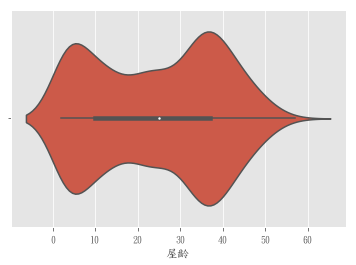

In [49]:
import seaborn as sns 
ax = sns.violinplot(x = df_ml3['屋齡']) #還算平均分散 以10年分桶即可

### 房齡-分桶

In [50]:
bins = [0,10,20,30,40,50,60]
df_ml3['屋齡'] = pd.cut(df_ml3['屋齡'] , bins)

In [55]:
from sklearn import preprocessing #因為屋齡有大小性質的影響， 所以採用標記的方式進行
le = preprocessing.LabelEncoder()
le.fit(list(df_ml3['屋齡'].value_counts().index) )

LabelEncoder()

In [57]:
df_ml3['屋齡'] = le.transform(df_ml3['屋齡']) + 1

In [59]:
df_ml3.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,屋齡,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738.0,1,1,1,3,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853.0,1,1,1,3,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815.0,3,2,2,2,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046.0,3,2,1,2,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
5,內湖區,15.12,47.74,257227.0,2,2,2,2,1228.0,0,0,0,1,0,0,0,0,0,0,0,0


In [60]:
df_ml3.drop(['鄉鎮市區'],axis = 1 , inplace= True)

In [61]:
df_ml3.info() #檢查一下沒有缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 640
Data columns (total 20 columns):
土地移轉總面積平方公尺    615 non-null float64
建物移轉總面積平方公尺    615 non-null float64
單價每平方公尺        615 non-null float64
建物現況格局-房       615 non-null int64
建物現況格局-廳       615 non-null int64
建物現況格局-衛       615 non-null int64
屋齡             615 non-null int64
總價元            615 non-null float64
中山區            615 non-null uint8
中正區            615 non-null uint8
信義區            615 non-null uint8
內湖區            615 non-null uint8
北投區            615 non-null uint8
南港區            615 non-null uint8
士林區            615 non-null uint8
大同區            615 non-null uint8
大安區            615 non-null uint8
文山區            615 non-null uint8
松山區            615 non-null uint8
萬華區            615 non-null uint8
dtypes: float64(4), int64(4), uint8(12)
memory usage: 70.4 KB


In [62]:
df_ml3.head()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,屋齡,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,6.34,55.19,233738.0,1,1,1,3,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,4.96,38.79,110853.0,1,1,1,3,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,13.72,149.24,160815.0,3,2,2,2,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,22.45,136.20,149046.0,3,2,1,2,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
5,15.12,47.74,257227.0,2,2,2,2,1228.0,0,0,0,1,0,0,0,0,0,0,0,0


# 五、簡單線性回歸

## 5.1 使用Scikit-Learn SGDRegressor
### 5.1.1 切分訓練及測試資料 (1 feature)  
##### PS: 這裡的測試資料可視為驗證資料集CV (最後的測試資料應另外保留)

In [70]:
from sklearn.model_selection import train_test_split

X = df_ml3.drop('總價元',axis= 1)
y = df_ml3[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
print(X_train.head())
print(X_test.head())

     土地移轉總面積平方公尺  建物移轉總面積平方公尺   單價每平方公尺  建物現況格局-房  建物現況格局-廳  建物現況格局-衛  屋齡  \
237        40.38       148.43   94321.0         3         2         2   3   
161        13.44        93.92  260860.0         2         2         2   4   
341        38.06       138.88  129608.0         3         2         2   4   
516         4.69        50.43  178465.0         2         1         1   4   
291         9.16        88.89  141748.0         3         2         2   4   

     中山區  中正區  信義區  內湖區  北投區  南港區  士林區  大同區  大安區  文山區  松山區  萬華區  
237    0    0    0    0    0    0    0    0    0    1    0    0  
161    0    0    0    0    0    0    0    0    1    0    0    0  
341    0    0    0    0    0    0    0    0    0    1    0    0  
516    1    0    0    0    0    0    0    0    0    0    0    0  
291    0    0    0    0    0    0    0    1    0    0    0    0  
     土地移轉總面積平方公尺  建物移轉總面積平方公尺   單價每平方公尺  建物現況格局-房  建物現況格局-廳  建物現況格局-衛  屋齡  \
151        39.50       112.99  125675.0         4         2     

### 5.1.2 特徵標準化(Standardization)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_normalized = sc.fit_transform(X_train) #細節要注意，先分train 與test 再做 標準化
X_test_normalized = sc.fit_transform(X_test)

In [84]:
# show 5 records
y_train.values[:5]

array([[1400.],
       [2450.],
       [1800.],
       [ 900.],
       [1260.]])

In [85]:
# 與flatten相似，但並不copy()
y_train.values.ravel()[:5]

array([1400., 2450., 1800.,  900., 1260.])

In [86]:
from sklearn import datasets, linear_model

#SGDRegressor的input y需要一維矩陣type
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# linear regression 物件
#max_iter: 次數, learning_rate: 學習速度樣式(None:不更改), eta0: 學習速率 , penalty 正則項 L1；L2才有必要
sgdr = linear_model.SGDRegressor(max_iter=20,learning_rate='constant',eta0=0.01,  penalty='l2')

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test))

# plt.scatter(X_train, y_train_1d,  color='blue', marker = 'x')

# plt.plot(X_train, sgdr.predict(X_train_normalized), color='green', linewidth=1)

# plt.ylabel('總價元(10K)')
# plt.xlabel('建物移轉總面積平方公尺')

# plt.show()

各變項參數: [ 9.07619738e+01  1.85890395e+03  9.33492490e+02  2.55124621e+01
 -1.74354191e+02 -4.46189107e+01 -8.00688485e+00  8.91226404e+00
  4.47888650e+01 -1.76695640e+02  1.50657474e+00 -1.84754010e+01
  3.57242139e+01 -1.10842249e+00  3.63238538e+01  1.38749337e+02
 -2.11430803e+01 -7.80384618e+01  5.23508827e+01]
MSE: 451428.68
R Square: 0.8970324630605325


### 5.1.3 K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve)

In [87]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\\Users\\AutoUser\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

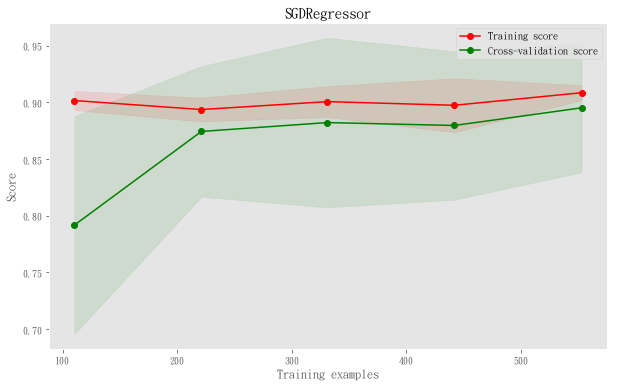

In [88]:
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

sc.fit(X_train)
plot_learning_curve(estimator, "SGDRegressor", sc.transform(X), y.values.ravel(), cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 5.2 使用Scikit-Learn LinearRegression

In [89]:
# linear regression: 使用正規方程
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized,y_test))

# plt.figure(figsize=(10,6))  #調整作圖大小
# plt.scatter(X_train, y_train,  color='blue', marker = 'x')
# plt.plot(X_train, regr.predict(X_train_normalized), color='green', linewidth=1)

# plt.ylabel('總價元(10K)')
# plt.xlabel('建物移轉總面積平方公尺')

# plt.show()

各變項參數: [[-3.58217887e+01  1.69181356e+03  8.13229249e+02  9.09741213e+01
  -1.01745029e+02 -2.40572598e+01  7.34831474e+01  3.70425977e+01
   3.80410528e+01 -9.95284069e+01 -2.64342725e+01  1.11059527e+00
   1.75573058e+01  1.89392233e+00  6.63092204e+00  4.11743901e+01
  -1.89988722e+01 -2.17834647e+01  2.99340301e+01]]
MSE: 294708.04
R Square: 0.9327792801046049


<module 'matplotlib.pyplot' from 'C:\\Users\\AutoUser\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

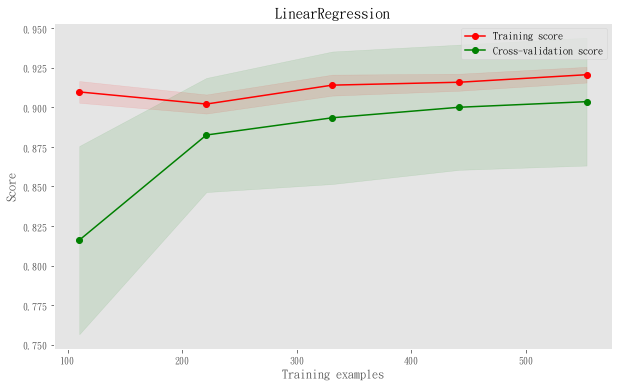

In [90]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "LinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 六、多變項線性迴歸
### 6.1 切分訓練及測試資料 (2 features)

In [91]:
X = df_ml3.drop('總價元',axis= 1)
y = df_ml3[['總價元']]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,屋齡,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
330,46.08,133.95,225433.0,3,2,2,1,0,0,0,1,0,0,0,0,0,0,0,0
263,8.33,88.71,163454.0,2,1,1,4,0,1,0,0,0,0,0,0,0,0,0,0
328,5.63,40.06,303545.0,1,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0
431,8.53,51.32,263055.0,1,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0
373,3.17,34.07,123276.0,1,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0


### 6.1 特徵標準化 (Standardization)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

### 6.2 使用Scikit-Learn LinearRegression

In [94]:
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized, y_test))

各變項參數: [[ 1.01255194e+01  1.80247786e+03  7.59780484e+02 -4.29301368e+00
  -9.46441319e+01 -7.52649910e+01  1.16771650e+02  5.75715864e+01
   5.73916856e+00 -3.41318827e+01 -3.71498255e+01 -2.27945238e+01
   6.67533181e+00  9.00825527e-01 -6.66735280e+00  5.13197973e+01
  -1.73452342e+01 -3.49051353e+01  3.20952504e+01]]
MSE: 601322.47
R Square: 0.8419431934249318


<module 'matplotlib.pyplot' from 'C:\\Users\\AutoUser\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

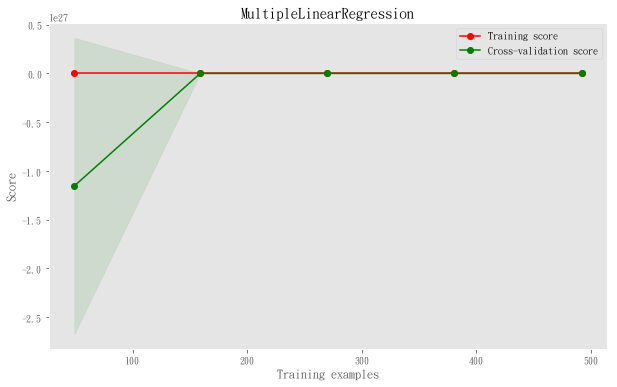

In [95]:
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
cv = KFold(n_splits=5, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "MultipleLinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))

### 6.3 使用Scikit-Learn SGDRegressor

In [96]:
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# SGD Regressor 
sgdr = linear_model.SGDRegressor(max_iter=5,learning_rate='constant',eta0=0.8)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test_1d))

各變項參數: [ 5.51474911e+12  4.01602093e+11  3.96649798e+12 -8.79813159e+11
  2.16225530e+12  2.32994443e+12  3.00260887e+10 -5.95038381e+11
 -2.32364696e+12  1.24328733e+12  9.20348770e+11 -1.94031017e+12
  3.08508944e+12  6.04210862e+11  1.84104696e+12  7.58923275e+11
 -1.16441946e+12 -3.16453333e+12  1.86371925e+12]
MSE: 146432897973581799292403712.00
R Square: -3.8489691498756686e+19


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

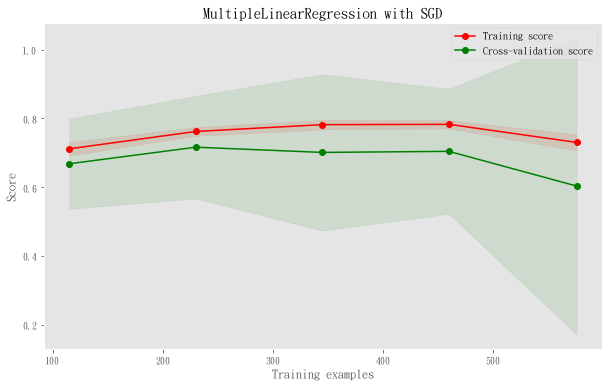

In [50]:
from sklearn.model_selection import ShuffleSplit
cv = KFold(n_splits=10, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 七、多項式(Polynomial) 非線性迴歸
### 切分訓練及測試資料 (1 feature)

### 創造高次方變項

In [97]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy() #原始X_train
X_test_raw = X_test.copy() #原始X_test
X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",regr.score(X_test_poly, y_test))

# Plot outputs
# plt.figure(figsize=(10,6))
# plt.scatter(X_test_raw, y_test,  color='blue', marker = 'x')

# X_fit = pd.DataFrame(np.arange(0,700,1)) #作圖用
# plt.plot(X_fit, regr.predict(quadratic.fit_transform(X_fit)), color='green', linewidth=1)


# plt.show()

各變項參數: 
 [[ 1.18710847e+06 -4.33255518e+01  8.12530837e+00  1.35507873e-03
   8.62026170e+01  4.86057935e+01  8.25891807e+01  4.22467016e+02
  -1.55389950e+01 -2.04092396e+02 -2.25915596e+02 -3.11860943e+02
   7.15996921e+01  2.75153640e+02  9.93252917e+01 -1.07201829e+02
   2.28953668e+02  2.74853413e+02 -1.20665797e+02  3.53898236e+01
   2.71174911e-02  3.57631435e-02  1.13257920e-04 -2.53689886e+00
  -6.06516873e+00  6.22160576e+00  6.79095347e+00  1.97325052e+01
  -8.23311680e+00 -3.54455865e+01  2.00767630e+00  1.64400939e+01
   1.47248380e+01 -7.27381375e+00  1.18596952e+01 -4.10086414e+01
   6.61358316e+00 -1.07531619e+01 -1.19879160e+01 -5.07042761e-03
   5.93715044e-05 -4.34695049e-01  1.35627625e-01  1.26456527e+00
  -1.01240425e+00  2.27388006e-01  4.31079196e+00  5.02285678e+00
   2.60838012e+00 -3.48347084e+00 -3.43872725e+00 -5.68864392e-02
  -9.15183337e-01  9.04354349e+00 -5.53705114e+00 -1.41456520e-01
   4.85173930e-01  2.83993273e-09 -4.43428328e-05 -1.23619212e-03
 

In [53]:
quadratic = PolynomialFeatures(degree=2)
X_raw = X.copy() #原始X_train
X_poly = quadratic.fit_transform(X_raw) #產生x^0, x^1, x^2

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

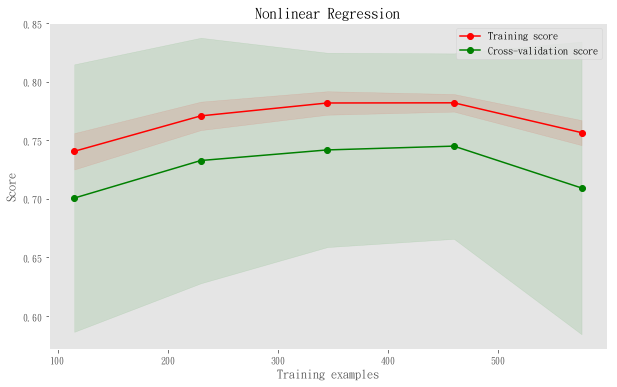

In [54]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5))